# **Pokemon Dataset Analysis**

### Import Libraries and Load Data

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import necessary libraries from scikit-learn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import export_text, plot_tree
from sklearn.neighbors import KNeighborsClassifier

plt.style.use('classic')
sns.set_theme(style="darkgrid", context="notebook")

In [2]:
# Load the dataset
df = pd.read_csv('Pokemon.csv')

# Display the first few rows of the dataframe
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


### Data Frame Info

In [3]:
df.info()

# object = string here, all that are not numbers or boolean are objects

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


### Descriptive Statistics

In [4]:
df.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


### Performance Basic Data Cleaning

In [5]:
df.rename(columns={
        'Type 1': 'Type1', 
        'Type 2': 'Type2',
        'Sp. Atk': 'Sp_Atk',
        'Sp. Def': 'Sp_Def',
    }, inplace=True)

df

,#,Name,Type1,Type2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


In [6]:
# Check for missing values in each column
na_counts = df.isna().sum()

na_counts

#               0
Name            0
Type1           0
Type2         386
Total           0
HP              0
Attack          0
Defense         0
Sp_Atk          0
Sp_Def          0
Speed           0
Generation      0
Legendary       0
dtype: int64

In [7]:
# Fill missing values in 'Type2' with 'None'
df['Type2'].fillna('None', inplace=True)

df['Type2']

C:\Users\radav\AppData\Local\Temp\ipykernel_24360\2123434874.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Type2'].fillna('None', inplace=True)


0      Poison
1      Poison
2      Poison
3      Poison
4        None
        ...  
795     Fairy
796     Fairy
797     Ghost
798      Dark
799     Water
Name: Type2, Length: 800, dtype: object

### Select features to use as predictors

In [8]:
df_X = df[['HP', 'Attack', 'Defense', 'Sp_Atk', 'Sp_Def', 'Speed']]

### Select target feature (non-legendary vs. legendary)

In [9]:
y = df['Legendary']

In [10]:
ss = StandardScaler()

# Set to True if you want to scale the features
do_scaling = True
if do_scaling:
    X = ss.fit_transform(df_X)
else:
    X = df_X.to_numpy()

X

array([[-0.95062622, -0.92490618, -0.79715364, -0.2391303 , -0.24818854,
        -0.80150318],
       [-0.3628221 , -0.5241302 , -0.34791742,  0.21955954,  0.29115635,
        -0.28501525],
       [ 0.42091674,  0.09244823,  0.29384863,  0.83114599,  1.01028289,
         0.40363531],
       ...,
       [ 0.42091674,  0.95565803, -0.44418232,  2.36011211,  2.08897269,
         0.05931003],
       [ 0.42091674,  2.49710411, -0.44418232,  2.97169856,  2.08897269,
         0.40363531],
       [ 0.42091674,  0.95565803,  1.4811158 ,  1.74852566,  0.65071962,
         0.05931003]], shape=(800, 6))

### Split data into training and test sets

In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

### Train classifier (In the case of the decision tree, visualize it)

In [12]:
dtClf = DecisionTreeClassifier(max_depth=3, random_state=42)
dtClf.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


### Get prediction

In [13]:
y_pred = dtClf.predict(X_test)

y_pred

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

### Evaluate prediction using accuracy

In [14]:
# Calculate accuracy by hand
comp = y_pred == y_test

sum(comp) / len(comp) 

0.95625

In [15]:
# Calculate accuracy using sklearn function
accuracy_score(y_test, y_pred)

0.95625

In [16]:
# Calculate accuracy using the classifier's score method
dtClf.score(X_test, y_test)

0.95625

### Show the tree structure

In [17]:
features = ['HP', 'Attack', 'Defense', 'Sp_Atk', 'Sp_Def', 'Speed']
print(export_text(dtClf, feature_names=features, decimals=2, show_weights=False))

|--- Sp_Atk <= 1.38
|   |--- Sp_Def <= 0.99
|   |   |--- Speed <= 3.50
|   |   |   |--- class: False
|   |   |--- Speed >  3.50
|   |   |   |--- class: True
|   |--- Sp_Def >  0.99
|   |   |--- Speed <= 0.51
|   |   |   |--- class: False
|   |   |--- Speed >  0.51
|   |   |   |--- class: False
|--- Sp_Atk >  1.38
|   |--- Attack <= 0.11
|   |   |--- class: False
|   |--- Attack >  0.11
|   |   |--- HP <= 1.11
|   |   |   |--- class: False
|   |   |--- HP >  1.11
|   |   |   |--- class: True



### Draw the tree

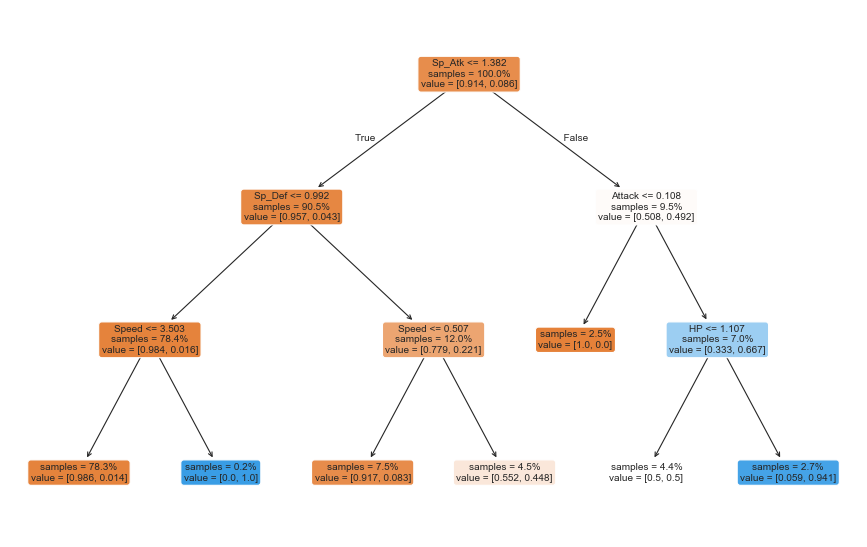

In [18]:
fig, ax = plt.subplots(figsize=(11, 7))

plot_tree(
    dtClf, 
    feature_names=features, 
    filled=True, 
    rounded=True,
    impurity=False,
    proportion=True,
    fontsize=9,
    ax=ax
)

fig.tight_layout()

### k-Nearest neighbors (k-NN) classifier

In [19]:
# k-Nearest Neighbors Classifier with 5 neighbors
knnClf = KNeighborsClassifier(5)
knnClf.fit(X_train, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [20]:
# Predict the labels for the test set
knnClf.predict(X_test)

array([ True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False,  True, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False,  True, False, False,  True, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [21]:
# Calculate accuracy by hand
comp = y_pred == y_test

sum(comp) / len(comp) 

0.95625

In [22]:
# Calculate accuracy using sklearn function
accuracy_score(y_test, y_pred)

0.95625

In [23]:
# Calculate accuracy using the classifier's score method
knnClf.score(X_test, y_test)

0.925

# Mini Project 2

In [24]:
# Display a table of the basic statistics (mean, standard deviation, median, etc) of the Pokémon features used to train and test the models before and after standard scaling
stats_before = df_X.describe().round(2)
stats_before

,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed
count,800.00,800.00,800.00,800.00,800.00,800.00
mean,69.26,79.00,73.84,72.82,71.90,68.28
std,25.53,32.46,31.18,32.72,27.83,29.06
min,1.00,5.00,5.00,10.00,20.00,5.00
25%,50.00,55.00,50.00,49.75,50.00,45.00
50%,65.00,75.00,70.00,65.00,70.00,65.00
75%,80.00,100.00,90.00,95.00,90.00,90.00
max,255.00,190.00,230.00,194.00,230.00,180.00


In [25]:
stats_after = ss.fit_transform(df_X)
stats_after = pd.DataFrame(stats_after, columns=df_X.columns)
stats_after.describe().round(2)

,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed
count,800.00,800.00,800.00,800.00,800.00,800.00
mean,-0.00,0.00,-0.00,0.00,-0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00
min,-2.67,-2.28,-2.21,-1.92,-1.87,-2.18
25%,-0.75,-0.74,-0.77,-0.71,-0.79,-0.80
50%,-0.17,-0.12,-0.12,-0.24,-0.07,-0.11
75%,0.42,0.65,0.52,0.68,0.65,0.75
max,7.28,3.42,5.01,3.71,5.68,3.85


#### What is the approximate mean and standard deviation of all features after scaling?

After applying standard scaling, the approximate mean of all features becomes 0 and the approximate standard deviation becomes 1.
This happens because **StandardScaler()** transforms each feature by subtracting its original mean and dividing by its standard deviation. As a result, the distribution of each feature is centered around zero and scaled to unit variance. This standardization ensures that all features contribute equally to the model and are on the same scale.

In [ ]:
# Show the distribution of accuracy for DT and kNN classifiers when using different random seeds for splitting data into train and test sets

results = []

for seed in range(1000):
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=seed)

    # Train Decision Tree Classifier
    dtClf = DecisionTreeClassifier(max_depth=3, random_state=seed)
    dtClf.fit(X_train, y_train)

    # Predict and calculate accuracy
    y_pred_dt = dtClf.predict(X_test)
    accuracy_dt = accuracy_score(y_test, y_pred_dt)
    results.append({"Seed": seed, "Accuracy": accuracy_dt, "Classifier": "DT"})

    # Train k-Nearest Neighbors Classifier
    knnClf = KNeighborsClassifier(5)
    knnClf.fit(X_train, y_train)

    # Predict and calculate accuracy
    y_pred_knn = knnClf.predict(X_test)
    accuracy_knn = accuracy_score(y_test, y_pred_knn)
    results.append({"Seed": seed, "Accuracy": accuracy_knn, "Classifier": "kNN"})

# Convert results to DataFrame
df_results = pd.DataFrame(results)

# Display the results
df_results.sort_values(by='Accuracy', ascending=False)

,Seed,Accuracy,Classifier
1567,783,0.9708,kNN
1959,979,0.9708,kNN
1278,639,0.9708,DT
594,297,0.9708,DT
623,311,0.9708,kNN
...,...,...,...
1454,727,0.8833,DT
1214,607,0.8833,DT
826,413,0.8833,DT
1126,563,0.8792,DT


In [27]:
# Table of the basic statistics of the accuracy results
stats_results = df_results.groupby('Classifier')['Accuracy'].describe().round(4)
stats_results

,count,mean,std,min,25%,50%,75%,max
Classifier,,,,,,,,
DT,1000.0,0.9295,0.0141,0.8792,0.9208,0.9292,0.9375,0.9708
kNN,1000.0,0.9386,0.0129,0.8917,0.9292,0.9375,0.9458,0.9708


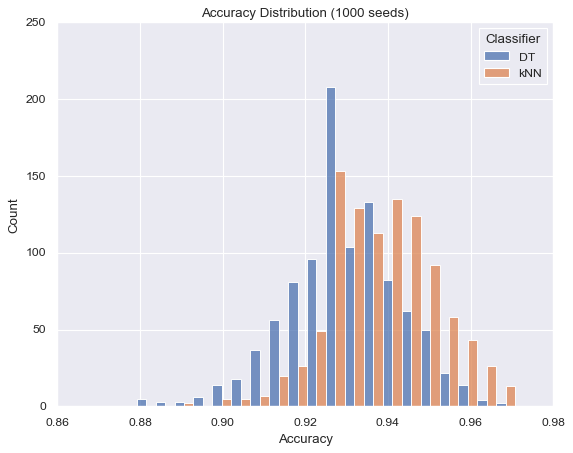

In [ ]:
# Plot the distribution of accuracies for both classifiers separately using one histogram
sns.histplot(
    data=df_results, 
    x="Accuracy", 
    hue="Classifier", 
    #kde=True, 
    palette="deep",
    multiple="dodge"
)
plt.title("Accuracy Distribution (1000 seeds)")
plt.show()

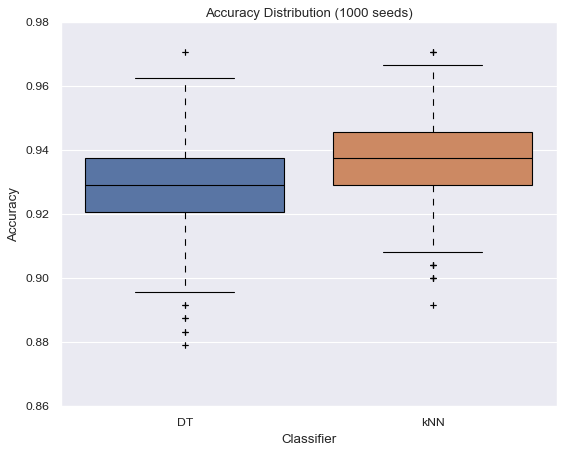

In [29]:
# Boxplot of the accuracy results for both classifiers
sns.boxplot(
    data=df_results, 
    x="Classifier", 
    y="Accuracy", 
    hue='Classifier',
    linecolor="black",
    palette="deep",
)
plt.title("Accuracy Distribution (1000 seeds)")
plt.show()